Top countries with highest and lowest rate for particular disorders:

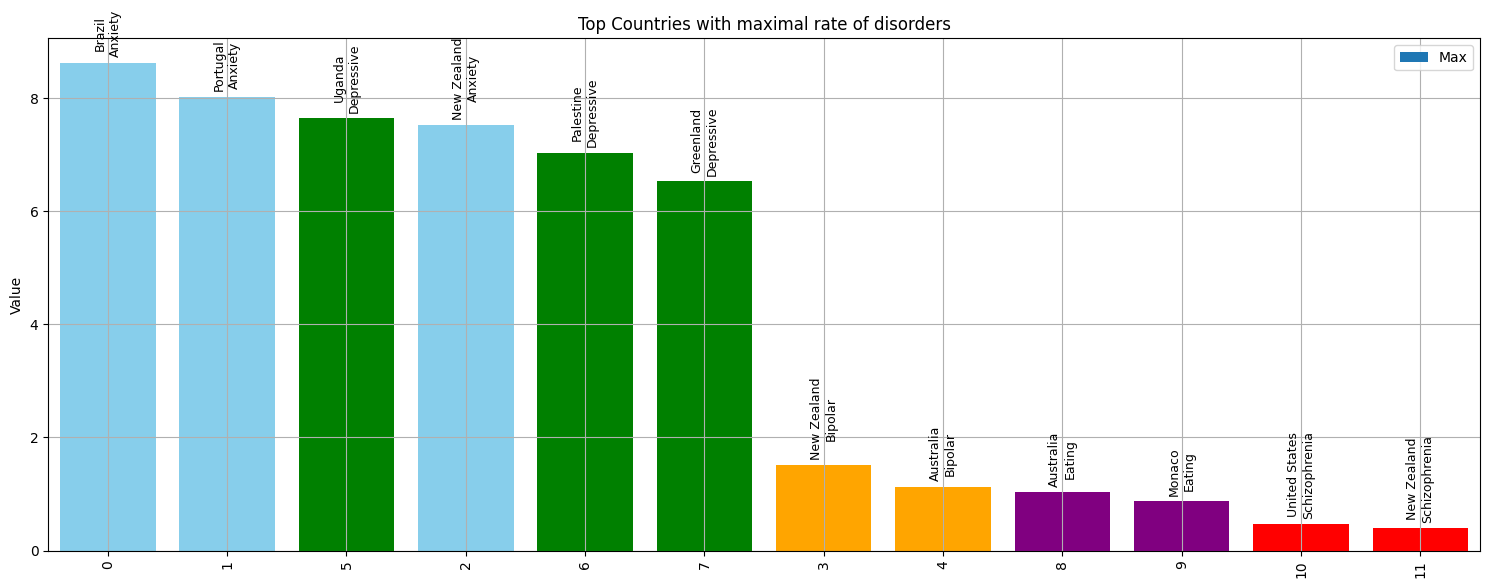

In [44]:
#%matplotlib inline
import pandas as pd

data=pd.read_csv("./../results/exstremes_all.csv")

#plot for higest rates:
import matplotlib.pyplot as plt
topcountries=data[data["Ranking"]=="Top"]
topcountries=topcountries.drop(["Min","Mean","Count","Ranking"],axis=1)
topcountries=topcountries.sort_values("Max",ascending=False)

colors = {
    "Anxiety": "skyblue",
    "Bipolar": "orange",
    "Depressive": "green",
    "Eating": "purple",
    "Schizophrenia": "red"
}
bar_colors = topcountries["Disorder"].map(colors)

topcountries.plot(kind="bar", figsize=(15, 6))
plt.title("Top Countries with maximal rate of disorders")


#plt.bar(topcountries["Country"] + " - " + topcountries["Disorder"], topcountries["Max"], color=bar_colors)
bars = plt.bar(topcountries["Country"] + " - " + topcountries["Disorder"], topcountries["Max"], color=bar_colors)

for bar, country, disorder in zip(bars, topcountries["Country"],topcountries["Disorder"]):
    height = bar.get_height()
    label = f"{country}\n{disorder}"
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, label,
             ha='center', va='bottom', fontsize=9, rotation=90)


plt.ylabel("Value")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.savefig("./../plots/Contries with higest rate of disorders", dpi=300, bbox_inches="tight")

plt.show()




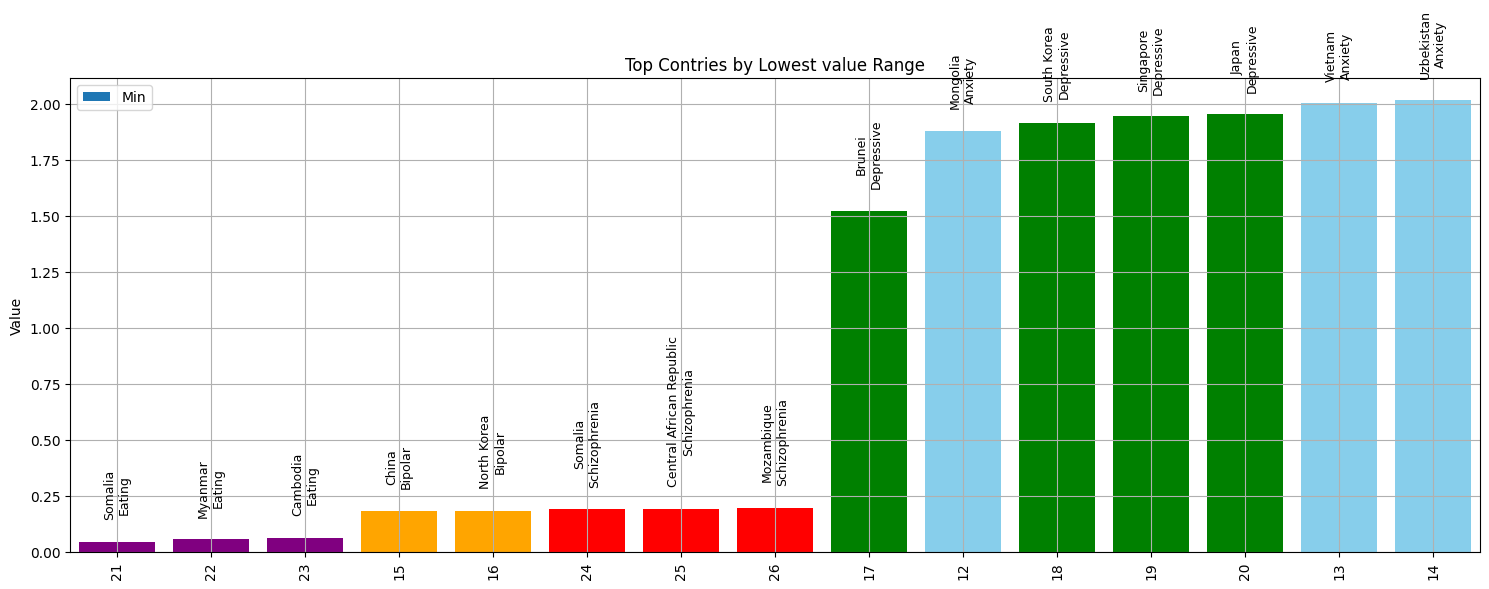

In [45]:
#plot for lowest rates:
import matplotlib.pyplot as plt
topcountries=data[data["Ranking"]=="Low"]
topcountries=topcountries.drop(["Max","Mean","Count","Ranking"],axis=1)
topcountries=topcountries.sort_values("Min",ascending=True)

colors = {
    "Anxiety": "skyblue",
    "Bipolar": "orange",
    "Depressive": "green",
    "Eating": "purple",
    "Schizophrenia": "red"
}
bar_colors = topcountries["Disorder"].map(colors)

topcountries.plot(kind="bar", figsize=(15, 6))
plt.title("Top Contries by Lowest value Range")
#plt.bar(topcountries["Country"] + " - " + topcountries["Disorder"], topcountries["Max"], color=bar_colors)
bars = plt.bar(topcountries["Country"] + " - " + topcountries["Disorder"], topcountries["Min"], color=bar_colors)

for bar, country, disorder in zip(bars, topcountries["Country"],topcountries["Disorder"]):
    height = bar.get_height()
    label = f"{country}\n{disorder}"
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, label,
             ha='center', va='bottom', fontsize=9, rotation=90)
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.savefig("./../plots/Contries with lowest rate of disorders", dpi=300, bbox_inches="tight")

plt.show()

Change of rate of disorders in time in Poland

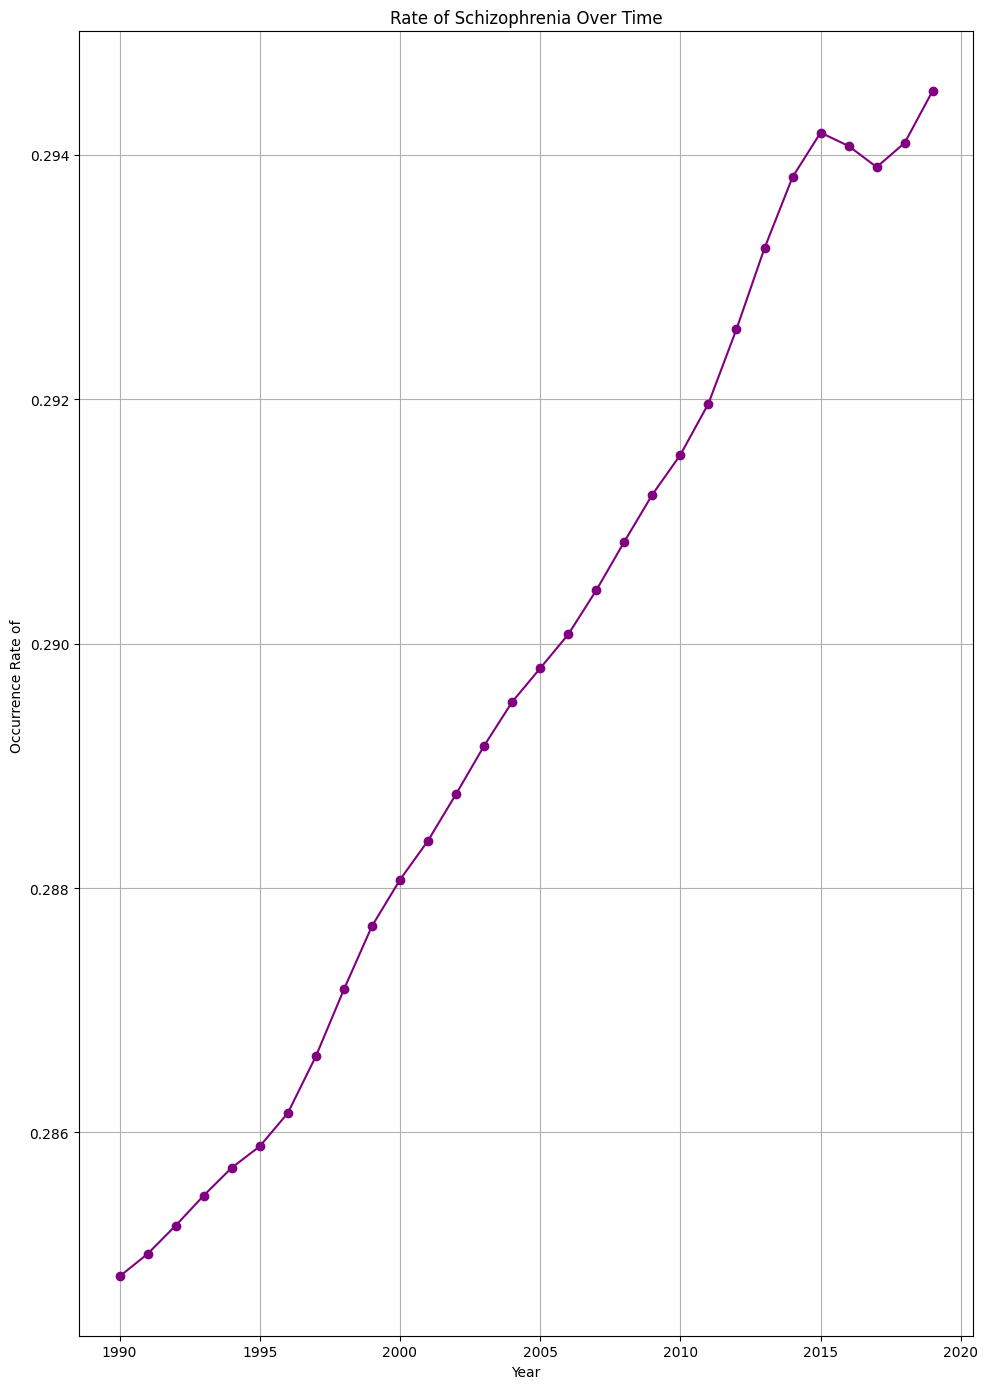

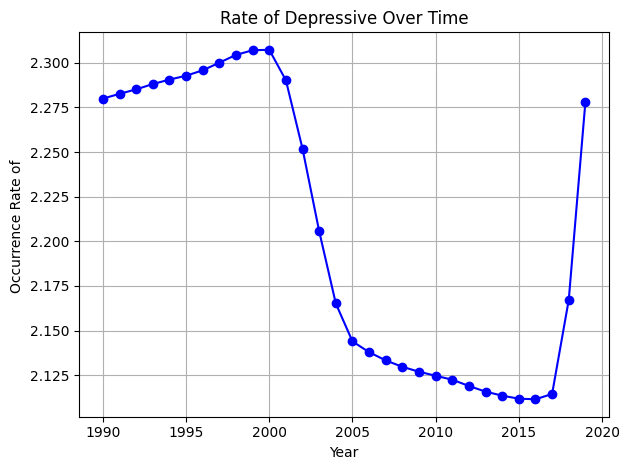

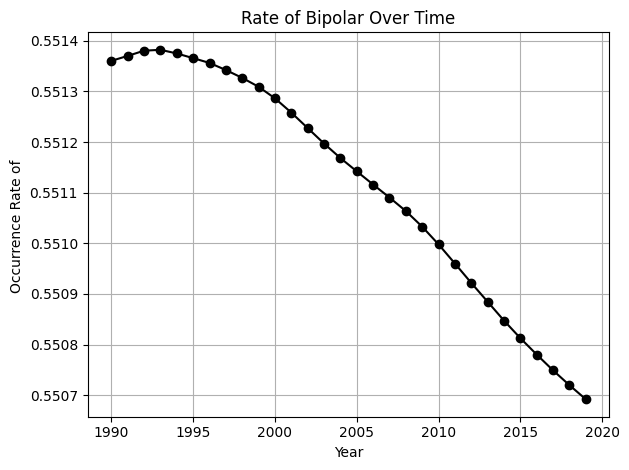

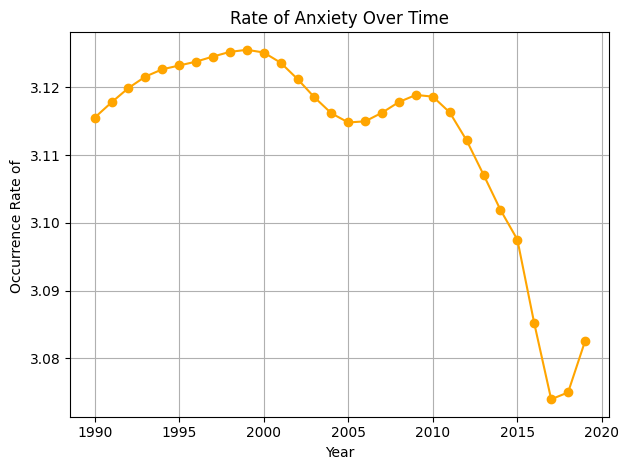

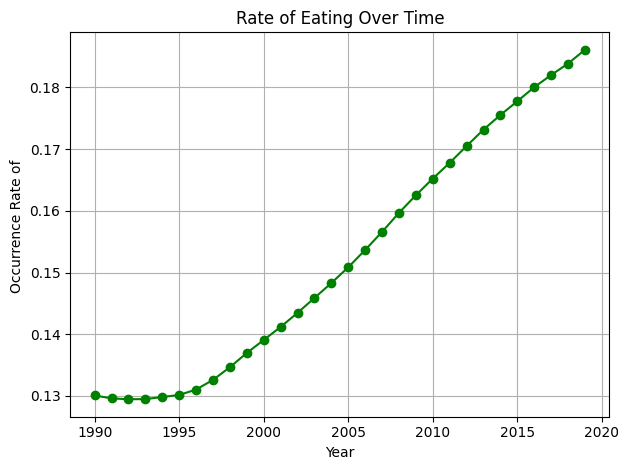

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

#import data
data=pd.read_csv("./../data/poland/all_poland.csv")
data=data.sort_values("Year")
#define colors by disorder
dot_colors = {
    "Anxiety": "orange",
    "Bipolar": "black",
    "Depressive": "blue",
    "Eating": "green",
    "Schizophrenia": "purple"
}

#plot

unique_disorders=data["Disorder"].unique()
plt.figure(figsize=(10, 14))



for disorder in unique_disorders:
    subset=data[data["Disorder"]==disorder].sort_values("Year")
    plt.plot(subset["Year"],subset["Occurences"],marker="o",linestyle="-",color=dot_colors[disorder])
    plt.title("Rate of "+disorder+" Over Time")
    plt.xlabel("Year")
    plt.ylabel("Occurrence Rate of ")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("./../plots/Poland"+disorder, dpi=300, bbox_inches="tight")
    plt.show()




Comparison of Poland rated with their neighboors:

['poland_Anxiety.csv', 'poland_Bipolar.csv', 'poland_Depressive.csv', 'poland_Eating.csv', 'poland_Schizophrenia.csv']
['./../data/pol_com\\poland_Anxiety.csv', './../data/pol_com\\poland_Bipolar.csv', './../data/pol_com\\poland_Depressive.csv', './../data/pol_com\\poland_Eating.csv', './../data/pol_com\\poland_Schizophrenia.csv']
./../data/pol_com/po


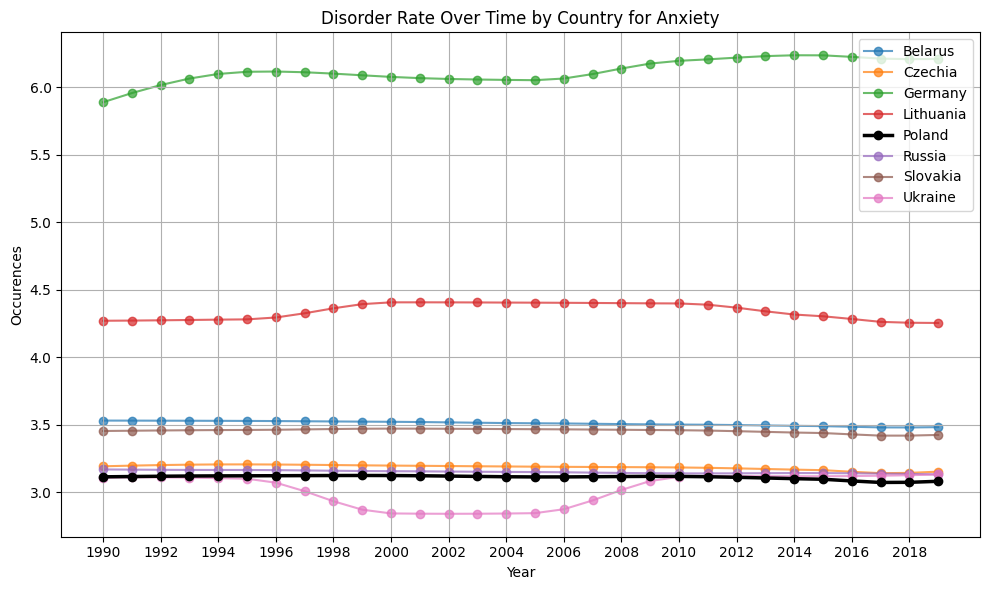

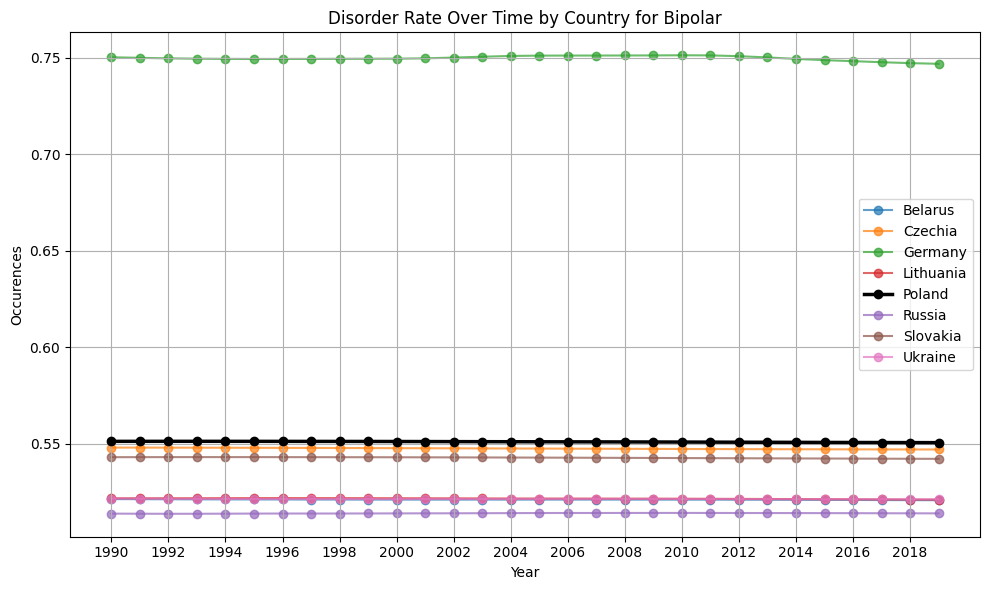

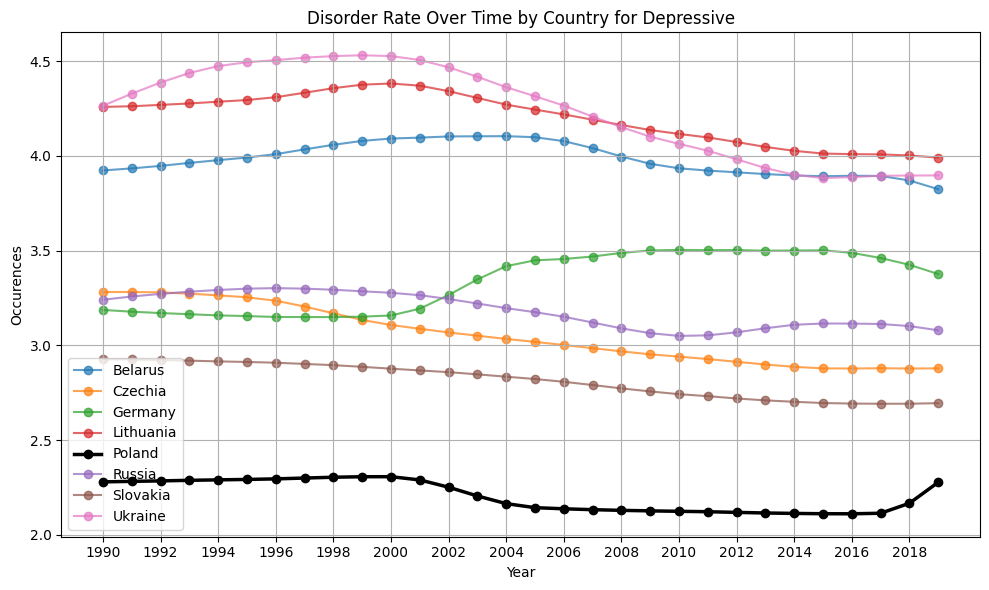

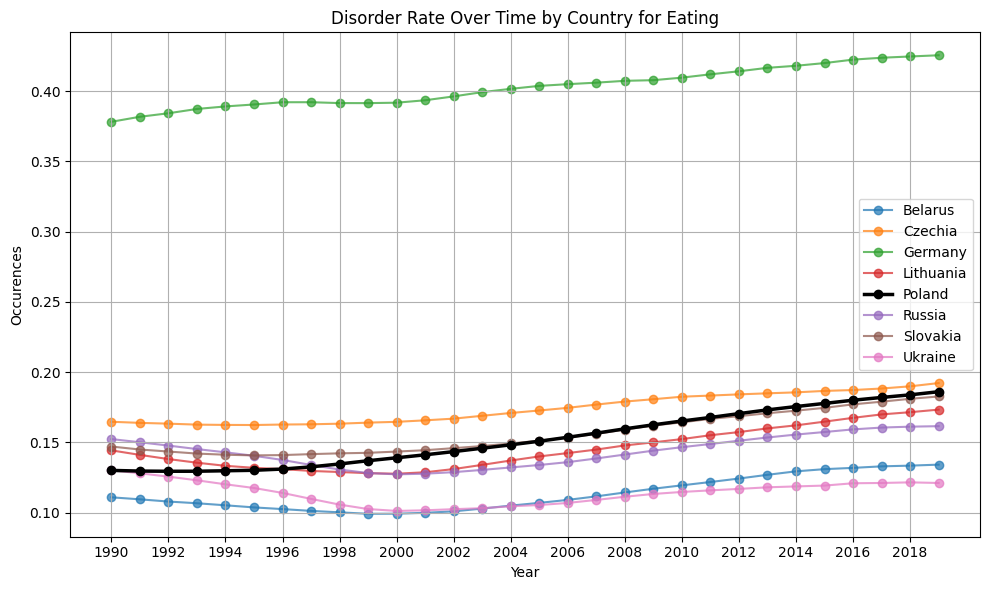

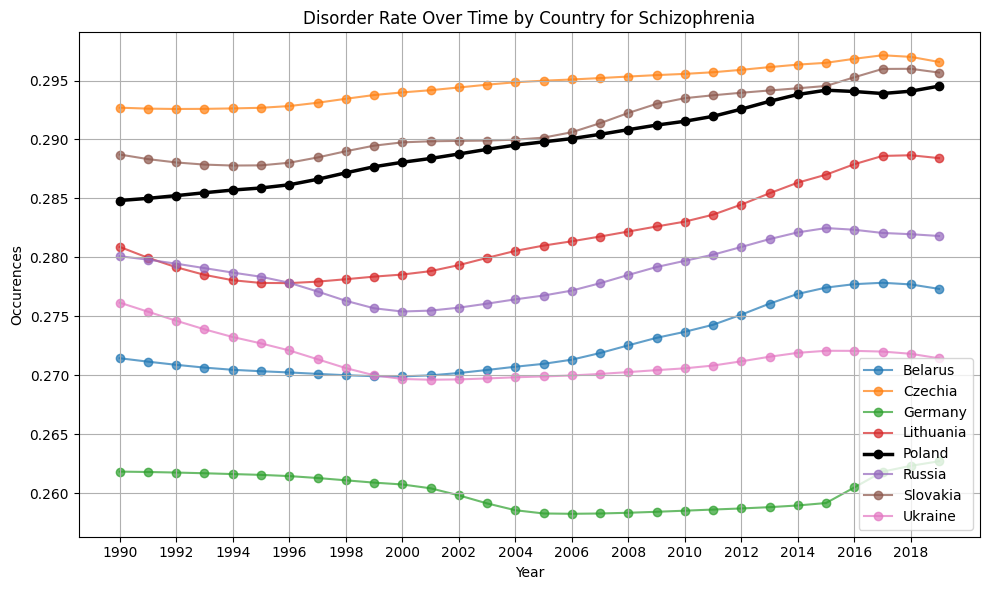

In [64]:
import glob
import os
path="./../data/pol_com/poland_*"
files=glob.glob(path)
file_names=[os.path.basename(f) for f in files]
print(file_names)
print(files)
print(path[:-6])


import pandas as pd
import matplotlib.pyplot as plt

for disorder in files:
    data=pd.read_csv(disorder)
    plt.figure(figsize=(10,6))
    for country in data.columns[1:]:
        if country=="Poland":
            plt.plot(data["Year"], data[country],marker="o",linestyle="-",label=country,linewidth=2.5,color="black",zorder=10)
        else:
            plt.plot(data["Year"], data[country],marker="o",linestyle="-",label=country, alpha=0.7,zorder=1)
    plt.title("Disorder Rate Over Time by Country for "+str(disorder[25:-4]))
    plt.xlabel("Year")
    plt.ylabel("Occurences")   
    plt.xticks(data["Year"][::2])
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    
    plt.savefig("./../plots/PolandComparison"+str(disorder[25:-4]), dpi=300, bbox_inches="tight")
